# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.214631e+01     1.385993e+01
 * time: 0.004057168960571289
     1     6.279509e+01     9.766812e+00
 * time: 0.011641979217529297
     2     5.686595e+01     1.442140e+01
 * time: 0.028806209564208984
     3     4.002967e+01     9.585210e+00
 * time: 0.1682901382446289
     4     2.868313e+01     8.393827e+00
 * time: 0.19086408615112305
     5     1.945900e+01     5.429663e+00
 * time: 0.20991802215576172
     6     1.357834e+01     5.112470e+00
 * time: 0.2259521484375
     7     1.017668e+01     4.342081e+00
 * time: 0.2386331558227539
     8     8.976117e+00     3.064660e+00
 * time: 0.2544691562652588
     9     7.809828e+00     2.940799e+00
 * time: 0.2705659866333008
    10     6.752326e+00     1.971981e+00
 * time: 0.28690505027770996
    11     6.466765e+00     2.160024e+00
 * time: 0.299793004989624
    12     6.351201e+00     1.391350e+00
 * time: 0.31266117095947266
    13     6.302569e+00     1.281715e+00
 * time: 0.3837

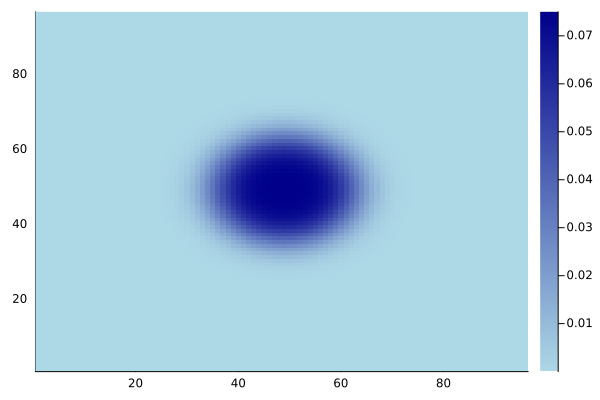

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)